In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np


# 7.1 SimpleRNN 레이어 생성 코드

In [ ]:
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

# 7.2 시퀀스 예측 데이터 생성

In [2]:
X=[]
Y=[]
for i in range(6):
    lst = list(range(i, i+4))
    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)) )
    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장
    Y.append( (i+4)/10 )

X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print( X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9



# 7.3 시퀀스 예측 모델 정의

In [4]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
                             tf.keras.layers.Dense(1)                             
                             ])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________



# 7.4 네트워크 훈련 및 결과 확인

In [5]:
model.fit( X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.3398581 ]
 [0.52265453]
 [0.655436  ]
 [0.7418727 ]
 [0.7909242 ]
 [0.809868  ]]


In [6]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.80389583]]
[[0.12247595]]


# **LSTM 레이어**


# 7.6 곱셈 문제 데이터 생성

In [9]:
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    #마킹할 숫자 2개의 인덱스 임의로 뽑기
    idx = np.random.choice(100,2, replace=False)
    #마킹 인덱스가 저장된 One-Hot Encoding Vector만들기
    zeros = np.zeros(100)
    zeros[idx]=1
    #마킹 인덱스와 random 숫자 합쳐서 X에 저장
    X.append( np.array(list( zip(zeros,lst) )))
    #마킹 인덱스가 1인 값들만 서로 곱해서 Y에 저장
    Y.append( np.prod( lst[idx]))

print(X[0], Y[0])

[[0.         0.69549071]
 [0.         0.04092641]
 [0.         0.94723513]
 [0.         0.54511187]
 [0.         0.60610145]
 [0.         0.11136434]
 [0.         0.3767052 ]
 [0.         0.65230106]
 [0.         0.24093872]
 [0.         0.80759013]
 [0.         0.00297417]
 [0.         0.3166103 ]
 [0.         0.64188978]
 [0.         0.77730745]
 [0.         0.11777544]
 [0.         0.34751511]
 [0.         0.18972561]
 [0.         0.83042454]
 [0.         0.08738355]
 [0.         0.94475607]
 [0.         0.04012988]
 [0.         0.56764251]
 [0.         0.18026749]
 [0.         0.05709405]
 [0.         0.25214326]
 [0.         0.57200901]
 [0.         0.92076404]
 [0.         0.30226237]
 [0.         0.80824388]
 [0.         0.89774578]
 [0.         0.02111223]
 [0.         0.18654421]
 [0.         0.35658697]
 [0.         0.31147925]
 [0.         0.33895376]
 [0.         0.63892634]
 [0.         0.00814989]
 [0.         0.72948524]
 [0.         0.34827549]
 [1.         0.01536756]


# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0608 - val_loss: 0.0491
Epoch 2/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0527 - val_loss: 0.0489
Epoch 3/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0517 - val_loss: 0.0504
Epoch 4/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0526 - val_loss: 0.0496
Epoch 5/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0516 - val_loss: 0.0496
Epoch 6/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0504 - val_loss: 0.0529
Epoch 7/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0506 - val_loss: 0.0494
Epoch 8/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0508 - val_loss: 0.0518
Epoch 9/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0508 - val_loss: 0.0489
Epoch 10/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0513 - val_loss: 0.0569

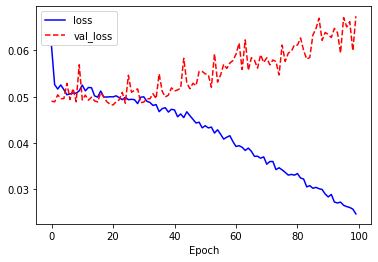

In [12]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 7.10 Test 데이터에 대한 예측 정확도 확인

In [13]:
model.evaluate( X[2560:],Y[2560:])
prediction = model.predict (X[2560:2560+5])

#5개 데이터에 대한 예측
for i in range(5):
    print( Y[2560+i] , '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] -Y[2560+i]) )

prediction = model.predict( X[2560:] )
fail = 0
for i in range( len(prediction)):
    #오차가 0.04이상이면 오답
    if abs( prediction[i][0] - Y[2560 +i]) > 0.04:
        fail +=1
print ('correctness:', (440-fail)/ 440 *100, '%')

14/14 [==============================] - 0s 9ms/step - loss: 0.0720
0.06271462582545813 	 0.1270655 	diff: 0.06435086883110468
0.5411533097498609 	 0.1914475 	diff: 0.3497058133356763
0.1926415572083491 	 0.17140494 	diff: 0.02123661433820903
0.016237492733926946 	 -0.038343318 	diff: 0.05458081054064768
0.02808286435033947 	 0.020932674 	diff: 0.007150189942380484
correctness: 9.772727272727273 %



# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


# 7.12 LSTM 네트워크 학습

In [15]:
X = np.array(X)
Y = np.array(Y)
history = model.fit( X[:2560], Y[:2560], epochs=100, validation_split= 0.2)

Epoch 1/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0517 - val_loss: 0.0486
Epoch 2/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0501 - val_loss: 0.0478
Epoch 3/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0502 - val_loss: 0.0480
Epoch 4/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0503 - val_loss: 0.0473
Epoch 5/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0499 - val_loss: 0.0472
Epoch 6/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0498 - val_loss: 0.0485
Epoch 7/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0501 - val_loss: 0.0476
Epoch 8/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0503 - val_loss: 0.0472
Epoch 9/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0498 - val_loss: 0.0476
Epoch 10/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0497 - val_loss: 0.0474

# 7.13 LSTM 네트워크 학습 결과 확인

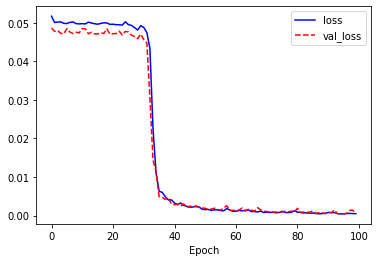

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# 7.14 Test 데이터에 대한 예측 정확도 확인

In [17]:
model.evaluate( X[2560:], Y[2560:])

prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 16ms/step - loss: 4.2923e-04
0.06271462582545813 	 0.069825284 	diff: 0.007110658357567232
0.5411533097498609 	 0.5484851 	diff: 0.00733179051945676
0.1926415572083491 	 0.22582021 	diff: 0.033178656347940566
0.016237492733926946 	 0.013764508 	diff: 0.0024729846653653922
0.02808286435033947 	 0.036604963 	diff: 0.008522098892668192
correctness: 94.0909090909091 %


# **GRU 레이어**


# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0658 - val_loss: 0.0476
Epoch 2/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0500 - val_loss: 0.0476
Epoch 3/100
64/64 [==============================] - 3s 52ms/step - loss: 0.0504 - val_loss: 0.0475
Epoch 4/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0502 - val_loss: 0.0475
Epoch 5/100
64/64 [==============================] - 3s 50ms/step - loss: 0.0502 - val_loss: 0.0476
Epoch 6/100
64/64 [==============================] - 3s 51ms/step - loss: 0.0498 - val_loss: 0.0495
Epoch 7/100
64/64 [==============================] - 3s 50ms/step - loss: 0.0500 - val_loss: 0.0473
Epoch 8/100
64/64 [==============================] - 3s 49ms/step - loss: 0.0497 - val_loss: 0.0473
Epoch 9/100
64/64 [==============================] - 3s 50ms/step - loss: 0.0496 - val_loss: 0.0477
Epoch 10/100
64/64 [==============================] - 3s 50ms/step - loss: 0.0497 - val_loss: 0.0483

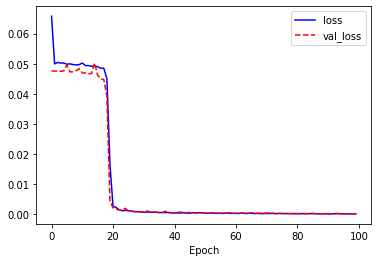

In [20]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 14ms/step - loss: 1.1547e-04
0.06271462582545813 	 0.069852814 	diff: 0.007138188252872865
0.5411533097498609 	 0.5490809 	diff: 0.007927598548631565
0.1926415572083491 	 0.19410968 	diff: 0.0014681210600835104
0.016237492733926946 	 0.04431994 	diff: 0.02808244613435728
0.02808286435033947 	 0.033819918 	diff: 0.005737053239086572
correctness: 100.0 %
